## 图像特征处理
```
图像特征处理：通过openCV处理图像，获取图像边界点，特征点等
```

### 1. 图像数据读取
```
图像读取：
cv2.imread 读取图片
cv2.IMREAD_COLOR：默认参数，读入一副彩色图片，忽略alpha通道
cv2.IMREAD_GRAYSCALE：读入灰度图片
cv2.IMREAD_UNCHANGED：顾名思义，读入完整图片，包括alpha通道
```

In [3]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

#图片数据读取
img=cv2.imread('opencv/cat.jpg')
print(img.shape)

(414, 500, 3)


```
图像数据格式转换：
cv2.cvtColor 将图像格式转化
cv2.cvtColor(p1,p2) 是颜色空间转换函数，p1是需要转换的图片，p2是转换成何种格式。
cv2.COLOR_BGR2RGB 将BGR格式转换成RGB格式
cv2.COLOR_BGR2GRAY 将BGR格式转换成灰度图片
```

In [3]:
# 获取灰度图
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(414, 500)

In [8]:
#从视屏中读取图像数据
vc = cv2.VideoCapture('opencv/test.mp4')

# 检查是否打开正确
if vc.isOpened(): 
    oepn, frame = vc.read()
else:
    open = False

while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break

vc.release()
cv2.destroyAllWindows()

### 2.图像显示

In [7]:
# 图像显示，可建立多个窗口
cv2.imshow('image',img_gray) 
# 等待时间 毫秒级 0表示任意按键终止
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [4]:
# 定义图像显示窗口
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

### 3.截取部分图像数据

In [5]:
img=cv2.imread('opencv/cat.jpg')
cat=img[0:50,0:200] 
cv_show('cat',cat)

### 4.颜色通道获取

In [7]:
b,g,r=cv2.split(img)  # 通过split操作可以将图像数据划分为b g r三个部分

In [8]:
img=cv2.merge((b,g,r))  #多通道合并
img.shape

(414, 500, 3)

In [9]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [10]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [11]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

### 5.边界填充
```
cv2.copyMakeBorder  
replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
BORDER_REPLICATE 一种填充方式,填充的目的，增加数据(pading)
BORDER_REPLICATE：复制法，也就是复制最边缘像素。
BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb
BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg
BORDER_CONSTANT：常量法，常数值填充。
```

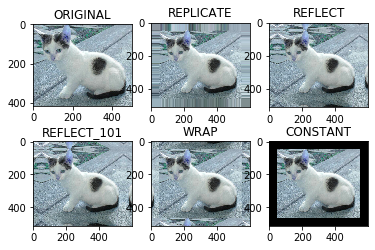

In [12]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

### 6.图像数值计算
```
图形计算即是矩阵运算
```

In [23]:
img_cat=cv2.imread('opencv/cat.jpg')
img_dog=cv2.imread('opencv/dog.jpg')
img_cat2= img_cat +10  #图像数据加10
img_cat[:5,:,0]        #图像数据部分截取

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [18]:
(img_cat3 + img_cat2)[:5,:,0] #像素值范围 0-256 直接相加会翻转

array([[ 48,  56,  66, ...,  76,  74,  72],
       [236, 244,   0, ...,  74,  72,  70],
       [236, 240,   0, ...,  76,  74,  72],
       [ 42,  46,  60, ...,  76,  74,  72],
       [ 70,  76,  90, ...,  84,  82,  80]], dtype=uint8)

In [20]:
cv2.add(img_cat3,img_cat3)[:5,:,0] #使用opencv的接口相加 会进行数据截断

array([[255, 255, 255, ..., 255, 255, 255],
       [236, 244, 255, ..., 255, 255, 255],
       [236, 240, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 7.图像融合

In [29]:
print(img_cat.shape)
print(img_dog.shape)

(414, 500, 3)
(429, 499, 3)


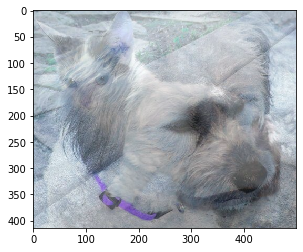

In [30]:
img_dog = cv2.resize(img_dog, (500, 414))  # 按照指定大小裁剪图像
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)  #按照指定权重融合图像
plt.imshow(res)

### 8.图像裁剪

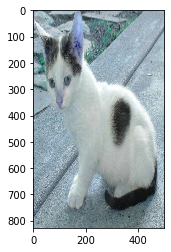

In [34]:
res = cv2.resize(img, (0, 0), fx=1, fy=2)   #从原始坐标 按照纵横比例裁剪
plt.imshow(res)

### 9.图像平滑操作
```
图像滤波操作包括线性滤波、非线性滤波
```
#### 线性滤波
```
线性滤波：是指图像滤波线性平滑变化，即经过数据线性卷积操作求得卷积中心点的数据值，效果是图像变得模糊，
缺点是噪音点过大，噪音点不好。
线性滤波：按照指定一定大小的卷积核，然后按照卷积核类型计算并更新每一个被卷积像素矩阵中心位置像素的值，是卷积域内像素值按照指定权重线性相加的结果。
线性滤波包括：均值滤波 方框滤波 高斯滤波

方框滤波：（矩阵中心像素值是周围像素值得均值）
box = cv2.boxFilter(img,-1,(3,3), normalize=False) 

均值滤波：（方框滤波的一种特殊滤波方式，即在方框滤波之前做了图像归一化操作）
box = cv2.boxFilter(img,-1,(3,3), normalize=True) 
或者
blur = cv2.blur(img, (3, 3))

高斯滤波：高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的，矩阵中心的值为其周围像素点的数据经过加权叠加处理后得到的值，和方框滤波相似，但是不同于方框滤波的是数据权重大小会由中心点向四周以扩散的方式从大到小变化，而方框滤波 的数据权重相等。
aussian = cv2.GaussianBlur(img, (5, 5), 1)

```
#### 非线性滤波

```

非线性滤波:是指图像像素滤波非线性平滑变化，即中心点数据不是通过周围像素线性相加所得，而是通过对周围像素排序并获取其中值点获取中心点像素点的值。中值滤波 傅里叶变换
优点：对于噪音点较大的图像效果较好。
中值滤波：中心点数据 为该点邻域内所有像素点的中值点
```
####  傅里叶变换的作用

- 高频：变化剧烈的灰度分量，例如边界

- 低频：变化缓慢的灰度分量，例如一片大海

####  滤波

- 傅里叶低通滤波器：只保留低频，会使得图像模糊

- 傅里叶高通滤波器：只保留高频，会使得图像细节增强
```
- opencv中主要就是cv2.dft()和cv2.idft()，输入图像需要先转换成np.float32 格式。
- 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现。
- cv2.dft()返回的结果是双通道的（实部，虚部），通常还需要转换成图像格式才能展示（0,255）。
```

In [35]:
img = cv2.imread('opencv/lenaNoise.png')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
img_gray

(512, 512)


array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [255,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [37]:
# 均值滤波
# 简单的平均卷积操作
blur = cv2.blur(img_gray, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
# 方框滤波
# 基本和均值一样，可以选择归一化
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img, (5, 5), 1)  

cv2.imshow('aussian', aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 展示所有的
res = np.hstack((blur,aussian,median))
print (res)
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 傅里叶变换

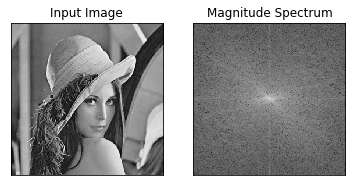

In [118]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('opencv/lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# 得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

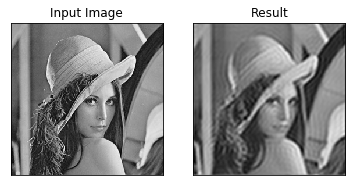

In [119]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('opencv/lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()   

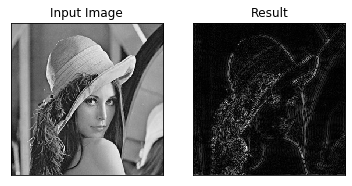

In [120]:
img = cv2.imread('opencv/lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show() 

### 10.形态学-腐蚀操作&&膨胀操作&&开运算&&闭运算&&梯度运算&&礼帽运算&&黑帽运算
```
图像腐蚀操作：解决图像中有较多毛刺的问题（噪音点的数据是离散分布的，毛刺相当于分布更加集中的噪音点）

图像膨胀操作：是图像中的毛刺更加突出，其原理和腐蚀操作相反，即核函数中数据使用当前矩阵值域内最大值赋值。

开运算：先腐蚀后膨胀 可以去掉毛刺、噪音点数据，这个效果和图像中值滤波的效果相似，不过比中值滤波更狠一些，中值滤波会有一些大的噪音点去不掉，二开运算会全部去掉

闭运算：先膨胀后腐蚀 不可以去掉毛刺，只是将一些噪音点数据去掉

梯度运算：膨胀 - 腐蚀 用于突出毛刺、噪音点像素 部分边缘点

礼帽运算：原始数据 - 开运算结果  求解出毛刺和噪音点数据 少部分边缘点

黑帽运算：闭运算 - 原始数据，求解出噪音点的数据

```

#### 腐蚀操作

In [44]:
img = cv2.imread('opencv/dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
kernel = np.ones((3,3),np.uint8) 
erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
pie = cv2.imread('opencv/pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
kernel = np.ones((30,30),np.uint8) 
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 膨胀操作

In [50]:
img = cv2.imread('opencv/dige.png')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
kernel = np.ones((3,3),np.uint8) 
dige_erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
kernel = np.ones((3,3),np.uint8) 
dige_dilate = cv2.dilate(dige_erosion,kernel,iterations = 1)

cv2.imshow('dilate', dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
pie = cv2.imread('opencv/pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 开运算
```
先腐蚀后膨胀
```

In [57]:
img = cv2.imread('opencv/dige.png')

kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 闭运算
```
先膨胀后腐蚀
```

In [58]:
img = cv2.imread('opencv/dige.png')

kernel = np.ones((5,5),np.uint8) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 梯度运算
```
膨胀操作 减去 腐蚀操作
```

In [59]:
pie = cv2.imread('opencv/pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)

res = np.hstack((dilate,erosion))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 礼帽操作
```
原始输入 减去 开运算结果
```

In [61]:
img = cv2.imread('opencv/dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 黑帽操作
```
闭运算结果  减去  原始输入
```

In [63]:
img = cv2.imread('opencv/dige.png')
blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat ', blackhat )
cv2.waitKey(0)
cv2.destroyAllWindows()

### 11. 图像梯度计算
```
图像梯度算子：sobel 算子 、 scharr算子 、laplacian算子
```

#### sobel算子
 ![title](opencv/sobel_1.png)

In [76]:
img = cv2.imread('opencv/pie.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows() 

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [67]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

cv_show(sobelx,'sobelx')

In [68]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx,'sobelx')

In [69]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)  
cv_show(sobely,'sobely')

In [74]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

因为sobel算子不计算左右或者上下交界处，所以不建议直接计算，而是先各自计算 x y方向，然后再相加

In [77]:
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

In [78]:
img = cv2.imread('opencv/lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

In [80]:
img = cv2.imread('opencv/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

#### scharr算子
![title](opencv/scharr.png)
![title](opencv/l.png)

In [82]:
img = cv2.imread('opencv/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')

In [84]:
img = cv2.imread('opencv/lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

### 11.Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

#### 1:高斯滤波器
![title](opencv/canny_1.png)

#### 2:梯度和方向
![title](opencv/canny_2.png)

#### 3：非极大值抑制
```
首先获取图像上全部像素点的变化梯度方向以及大小后，然后对全图像进行扫描，去除不属于边界的点，检查每一个像素，看词像素是否是周围具有相同梯度方向中最大的。检测和后处理方法是：在同一方向上，比较当前点和旁边两个点的梯度值，如果当前点的梯度值是最大的，那么就把当前的点保存下来，否则就把当前的点抑制掉，即将其变为0。 目的是让边界特征点更加突出
```
![title](opencv/canny_3.png)

![title](opencv/canny_6.png)

#### 4：双阈值检测
```
首先设定两个阈值，一个是最大阈值和最小阈值，对于小于最小阈值的点直接判断为非边界点，对于大于最大阈值的直接判断为边界点，对于在最小阈值和最大阈值之间的值，如果判断点旁边是一个已经判断为边界点的点，那么当前前判断为边界点，否则判断为非边界点。
```
![title](opencv/canny_5.png)

In [85]:
img=cv2.imread("opencv/lena.jpg",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,80,150)   #设置双阈值的 双阈值检测
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')

In [87]:
img=cv2.imread("opencv/car.png",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,120,250)
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')

 ### 12.高斯金字塔
 - 1) 进行一个高斯内核的卷积操作 
 
 - 2) 向下采样 即将高斯层数据进行一个压缩（压缩方法 将偶数行和偶数列删除）
 
 - 3) 向上采样，数据扩充，首先将数据扩充为原来的长宽的2倍，然后拿到扩充的结果，再使用高斯核进行卷积
 
 ```
上采样：up=cv2.pyrUp(img)
下采样：down=cv2.pyrDown(img)

 ```
- 高斯金字塔
- 拉普拉斯金字塔
![title](opencv/Pyramid_1.png)

#### 高斯金字塔：向下采样方法（缩小）
![title](opencv/Pyramid_2.png)

#### 高斯金字塔：向上采样方法（放大）
![title](opencv/Pyramid_3.png)

In [88]:
img=cv2.imread("opencv/AM.png")
cv_show(img,'img')
print (img.shape)

(442, 340, 3)


In [89]:
up=cv2.pyrUp(img)
cv_show(up,'up')
print (up.shape)

(884, 680, 3)


In [90]:
down=cv2.pyrDown(img)
cv_show(down,'down')
print (down.shape)

(221, 170, 3)


In [91]:
up2=cv2.pyrUp(up)
cv_show(up2,'up2')
print (up2.shape)

(1768, 1360, 3)


In [92]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show(up_down,'up_down')

In [93]:
cv_show(np.hstack((img,up_down)),'up_down')

In [94]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show(img-up_down,'img-up_down')

#### 拉普拉斯金字塔
![title](opencv/Pyramid_4.png)

In [96]:
down=cv2.pyrDown(img)
down_up=cv2.pyrUp(down)
l_1=img-down_up
cv_show(l_1,'l_1')

### 13.图像轮廓

#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

![title](opencv/chain.png)

为了更高的准确率，使用二值图像。

In [99]:
img = cv2.imread('opencv/contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv_show(thresh,'thresh')

In [102]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # 获取轮廓数据

In [103]:
cv_show(img,'img')

In [105]:
#传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
# 注意需要copy,要不原图会变。。。
draw_img = img.copy()                # 获取原图数据
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)  #将原图数据和轮廓数据同时传入 第三个参数-1表示绘制每一个边框
cv_show(res,'res')

In [106]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 0, 255), 2)  #将原图数据和轮廓数据同时传入 第三个参数0 表示绘制其中一个边框
cv_show(res,'res')

#### 轮廓特征计算

In [107]:
cnt = contours[0]
cv2.contourArea(cnt)  # 面积
cv2.arcLength(cnt,True) #周长

437.9482651948929

#### 轮廓相似
![title](opencv/contours3.png)

In [109]:
img = cv2.imread('opencv/contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show(res,'res')

In [110]:
epsilon = 0.15*cv2.arcLength(cnt,True) 
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res,'res')

#### 绘制边界矩形

In [113]:
img = cv2.imread('opencv/contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)  #获取边界图形数据
cnt = contours[0]                          #读取边界图形的坐标矩阵

x,y,w,h = cv2.boundingRect(cnt)            #从边界坐标矩阵中获取坐标数据
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #根据坐标数据绘制矩形
cv_show(img,'img')

In [114]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.5154317244724715


In [121]:
(x,y),radius = cv2.minEnclosingCircle(cnt)  #从边界图形数据中回去绘制圆的中心点坐标和半径
center = (int(x),int(y)) 
radius = int(radius) 
img = cv2.circle(img,center,radius,(0,255,0),2)  # 根据图形数据中心点坐标和半径绘制圆
cv_show(img,'img')

### 14.图像特征-harris角点检测

![title](opencv/harris_1.png)

#### 角点检测基本原理

![title](opencv/harris_2.png)
![title](opencv/harris_9.png)
![title](opencv/harris_4.png)
![title](opencv/harris_5.png)
![title](opencv/harris_6.png)
![title](opencv/harris_11.png)

#### cv2.cornerHarris() 
- img： 数据类型为 ﬂoat32 的入图像
- blockSize： 角点检测中指定区域的大小
- ksize： Sobel求导中使用的窗口大小 
- k： 取值参数为 [0,04,0.06]

In [123]:
import cv2 
import numpy as np

img = cv2.imread('opencv/test_1.jpg')
print ('img.shape:',img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
print ('dst.shape:',dst.shape)

img.shape: (800, 1200, 3)
dst.shape: (800, 1200)


In [124]:
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### 15.图像尺度空间 Scale Invariant Feature Transform（SIFT）

```
在一定的范围内，无论物体是大还是小，人眼都可以分辨出来，然而计算机要有相同的能力却很难，所以要让机器能够对物体在不同尺度下有一个统一的认知，就需要考虑图像在不同的尺度下都存在的特点。
```

尺度空间的获取通常使用高斯模糊来实现

![title](opencv/sift_3.png)

![title](opencv/sift_2.png)

####  高斯差分金字塔（DOG）

![title](opencv/sift_5.png)
![title](opencv/sift_6.png)

####  DoG空间极值检测
```
为了寻找尺度空间的极值点，每个像素点要和其图像域（同一尺度空间）和尺度域（相邻的尺度空间）的所有相邻点进行比较，当其大于（或者小于）所有相邻点时，该点就是极值点。如下图所示，中间的检测点要和其所在图像的3×3邻域8个像素点，以及其相邻的上下两层的3×3领域18个像素点，共26个像素点进行比较。
```
![title](opencv/sift_7.png)

#### 关键点的精确定位

```
这些候选关键点是DOG空间的局部极值点，而且这些极值点均为离散的点，精确定位极值点的一种方法是，对尺度空间DoG函数进行曲线拟合，计算其极值点，从而实现关键点的精确定位。
```

![title](opencv/sift_8.png)

![title](opencv/sift_9.png)

####  消除边界响应
![title](opencv/sift_10.png)

####  特征点的主方向
![title](opencv/sift_11.png)

```
每个特征点可以得到三个信息(x,y,σ,θ)，即位置、尺度和方向。具有多个方向的关键点可以被复制成多份，然后将方向值分别赋给复制后的特征点，一个特征点就产生了多个坐标、尺度相等，但是方向不同的特征点。
```

#### 生成特征描述
```
在完成关键点的梯度计算后，使用直方图统计邻域内像素的梯度和方向。
```
![title](opencv/sift_12.png)

```
为了保证特征矢量的旋转不变性，要以特征点为中心，在附近邻域内将坐标轴旋转θ角度，即将坐标轴旋转为特征点的主方向。
```
![title](opencv/sift_14.png)

```
旋转之后的主方向为中心取8x8的窗口，求每个像素的梯度幅值和方向，箭头方向代表梯度方向，长度代表梯度幅值，然后利用高斯窗口对其进行加权运算，最后在每个4x4的小块上绘制8个方向的梯度直方图，计算每个梯度方向的累加值，即可形成一个种子点，即每个特征的由4个种子点组成，每个种子点有8个方向的向量信息。
```
![title](opencv/sift_16.png)

```
论文中建议对每个关键点使用4x4共16个种子点来描述，这样一个关键点就会产生128维的SIFT特征向量。 
```
![title](opencv/sift_17.png)

#### opencv SIFT函数

In [125]:
import cv2
import numpy as np

img = cv2.imread('opencv/test_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()   
kp = sift.detect(gray, None)

In [ ]:
img = cv2.drawKeypoints(gray, kp, img)   # 获取特征点

cv2.imshow('drawKeypoints', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
kp, des = sift.compute(gray, kp) # 计算特征值

### 16.特征匹配
```
1. 计算并确定两个图形的特征点
2. 然后进行匹配特征
```

In [127]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('opencv/box.png', 0)
img2 = cv2.imread('opencv/box_in_scene.png', 0)

def cv_show(name,img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

1对1匹配

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()    #创建操作句柄

kp1, des1 = sift.detectAndCompute(img1, None)   #获取特征点
kp2, des2 = sift.detectAndCompute(img2, None)   #获取特征点

# crossCheck表示两个特征点要互相匹，例如A中的第i个特征点与B中的第j个特征点最近的，并且B中的第j个特征点到A中的第i个特征点也是 
#NORM_L2: 归一化数组的(欧几里德距离)，如果其他特征计算方法需要考虑不同的匹配计算方式
bf = cv2.BFMatcher(crossCheck=True)

In [ ]:
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,flags=2)

k对最佳匹配

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
        


```
如果需要更快速完成操作，可以尝试使用cv2.FlannBasedMatcher
```
![title](opencv/ransac_1.png)

```
选择初始样本点进行拟合，给定一个容忍范围，不断进行迭代
```
![title](opencv/ransac_2.png)

```
每一次拟合后，容差范围内都有对应的数据点数，找出数据点个数最多的情况，就是最终的拟合结果
```
![title](opencv/ransac_3.png)

```
单应性矩阵
```
![title](opencv/ransac_4.png)

### 17光流估计

光流是空间运动物体在观测成像平面上的像素运动的“瞬时速度”，根据各个像素点的速度矢量特征，可以对图像进行动态分析，例如目标跟踪。

- 亮度恒定：同一点随着时间的变化，其亮度不会发生改变。

- 小运动：随着时间的变化不会引起位置的剧烈变化，只有小运动情况下才能用前后帧之间单位位置变化引起的灰度变化去近似灰度对位置的偏导数。

- 空间一致：一个场景上邻近的点投影到图像上也是邻近点，且邻近点速度一致。因为光流法基本方程约束只有一个，而要求x，y方向的速度，有两个未知变量。所以需要连立n多个方程求解。

![title](opencv/lk_2.png)

![title](opencv/lk_1.png)

####  Lucas-Kanade 算法
![title](opencv/lk_3.png)

```
如何求解方程组呢？看起来一个像素点根本不够，在物体移动过程中还有哪些特性呢？
```
![title](opencv/lk_4.png)

####  cv2.calcOpticalFlowPyrLK():
参数：
- prevImage 前一帧图像

- nextImage 当前帧图像

- prevPts 待跟踪的特征点向量

- winSize 搜索窗口的大小

- maxLevel 最大的金字塔层数

返回：

- nextPts 输出跟踪特征点向量

- status 特征点是否找到，找到的状态为1，未找到的状态为0

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('test.avi')

# 角点检测所需参数
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7)

# lucas kanade参数
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2)

# 随机颜色条
color = np.random.randint(0,255,(100,3))

# 拿到第一帧图像
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
# 返回所有检测特征点，需要输入图像，角点最大数量（效率），品质因子（特征值越大的越好，来筛选）
# 距离相当于这区间有比这个角点强的，就不要这个弱的了
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# 创建一个mask
mask = np.zeros_like(old_frame)

while(True):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 需要传入前一帧和当前图像以及前一帧检测到的角点
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # st=1表示
    good_new = p1[st==1]
    good_old = p0[st==1]

    # 绘制轨迹
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(150) & 0xff
    if k == 27:
        break

    # 更新
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()